In [2]:
import pandas as pd

In [6]:
data=pd.read_csv("Fraud_check.csv")

In [7]:
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [8]:
data.shape

(600, 6)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


Data Preprocesssing

In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
le=LabelEncoder()

In [12]:
data.iloc[:,0]=le.fit_transform(data.iloc[:,0])
data.iloc[:,1]=le.fit_transform(data.iloc[:,1])
data.iloc[:,5]=le.fit_transform(data.iloc[:,5])


In [13]:
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0


In [15]:
from sklearn.ensemble import IsolationForest
clf=IsolationForest(random_state=10,contamination=0.03)
clf.fit(data)

IsolationForest(contamination=0.03, random_state=10)

In [16]:
data['scores']=clf.decision_function(data)

In [17]:
data['anomaly']=clf.predict(data.iloc[:,0:6])

In [18]:
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,scores,anomaly
0,0,2,68833,50047,10,1,0.078403,1
1,1,0,33700,134075,18,1,0.064018,1
2,0,1,36925,160205,30,1,0.024238,1
3,1,2,50190,193264,15,1,0.050332,1
4,0,1,81002,27533,28,0,0.026430,1


In [19]:
data[data['anomaly']==-1]

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,scores,anomaly
16,1,0,24987,34551,29,0,-0.000954,-1
29,1,0,94033,41863,30,1,-0.010532,-1
34,1,0,12514,183767,1,1,-0.024513,-1
65,0,0,58312,194738,29,0,-0.002204,-1
112,1,2,96355,193038,26,1,-0.009398,-1
119,0,0,97318,47202,30,1,-0.013259,-1
126,1,0,15853,195022,3,1,-0.009607,-1
145,0,0,33962,197422,2,1,-0.006662,-1
161,1,1,93659,185596,30,1,-0.020193,-1
168,0,0,18199,167629,30,0,-0.011512,-1


In [21]:
data1 = data[~data['anomaly'].isin([-1])]
data1.head(10)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,scores,anomaly
0,0,2,68833,50047,10,1,0.078403,1
1,1,0,33700,134075,18,1,0.064018,1
2,0,1,36925,160205,30,1,0.024238,1
3,1,2,50190,193264,15,1,0.050332,1
4,0,1,81002,27533,28,0,0.026430,1
5,0,0,33329,116382,0,0,0.013834,1
6,0,0,83357,80890,8,1,0.078273,1
7,1,2,62774,131253,3,1,0.071802,1
8,0,2,83519,102481,12,1,0.097018,1
9,1,0,98152,155482,4,1,0.007267,1


In [22]:
from sklearn.preprocessing import Binarizer

In [23]:
bin=Binarizer(threshold=30000)

In [24]:
col=data1['Taxable.Income'].values
col=col.reshape(-1,1)

In [25]:
col;

In [26]:
data2=data1.drop(data1.columns[[2]],axis=1)
x=data2.iloc[:,:]
y=bin.fit_transform(col)

In [27]:
columns=data2.columns

In [28]:
data2.head()

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,scores,anomaly
0,0,2,50047,10,1,0.078403,1
1,1,0,134075,18,1,0.064018,1
2,0,1,160205,30,1,0.024238,1
3,1,2,193264,15,1,0.050332,1
4,0,1,27533,28,0,0.026430,1


In [29]:
data3=data2.drop(data2.columns[[0, 4, 5, 6]],axis=1)
x1=data3.iloc[:,:]

In [30]:
x1

,Marital.Status,City.Population,Work.Experience
0,2,50047,10
1,0,134075,18
2,1,160205,30
3,2,193264,15
4,1,27533,28
...,...,...,...
595,0,39492,7
596,0,55369,2
597,0,154058,0
598,1,180083,17


Train test split

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
x_train,x_test,y_train,y_test=train_test_split(x1,y,test_size=0.3,random_state=40)

Decision Tree C5.0

In [33]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

In [34]:
model=DecisionTreeClassifier(criterion='entropy',max_depth=4)

In [35]:
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

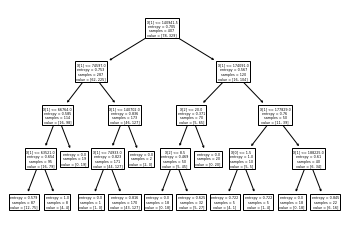

In [36]:
tree.plot_tree(model);

In [37]:
preds=model.predict(x_test)
preds

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1],
      dtype=int64)

In [38]:
pd.Series(preds).value_counts()

1    169
0      6
dtype: int64

Train accuracy

In [39]:
pred1 = model.predict(x_train)
from sklearn.metrics import confusion_matrix
confusion_matrics=confusion_matrix(y_train, pred1)
print(confusion_matrics)

[[ 11  67]
 [  5 324]]


In [40]:
((324+7)/(324+7+71+5))*100

81.32678132678133

In [41]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train, pred1)

0.8230958230958231

Test accuracy

In [42]:
confusion_matrics=confusion_matrix(y_test, preds)
print(confusion_matrics)

[[  2  35]
 [  4 134]]


In [43]:
((2+134)/(134+35+2+4))*100

77.71428571428571

In [44]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, preds)

0.7771428571428571

###Decision Tree CART (Classification)

In [45]:
from sklearn.tree import DecisionTreeClassifier
model_gini=DecisionTreeClassifier(criterion='gini',max_depth=3)

In [46]:
model_gini.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

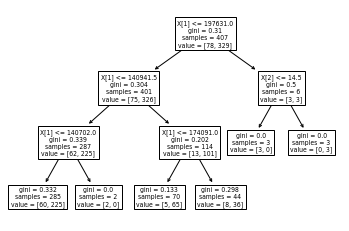

In [47]:
tree.plot_tree(model_gini);

In [48]:
preds=model_gini.predict(x_test)
preds

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int64)

In [49]:
pd.Series(preds).value_counts()

1    173
0      2
dtype: int64

In [50]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train, pred1)

0.8230958230958231

In [51]:
pred1 = model.predict(x_train)
from sklearn.metrics import confusion_matrix
confusion_matrics=confusion_matrix(y_train, pred1)
print(confusion_matrics)

[[ 11  67]
 [  5 324]]


In [52]:
((324+7)/(324+7+71+5))*100

81.32678132678133

In [53]:
confusion_matrics=confusion_matrix(y_test, preds)
print(confusion_matrics)

[[  0  37]
 [  2 136]]


In [54]:
((0+136)/(136+37+2))*100

77.71428571428571

In [55]:
accuracy_score(y_test, preds)*100

77.71428571428571

CART and C5.0  gives good accuracy